# Enabling GPU for my notebook (You can remove this code if you are not using GPU)

In [1]:
import plaidml.keras
import os
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# 1. Import and load necessary packages

# 2. Create empty lists, we will use them to append data into it (Angles & categories)

# 3. Display data in dataframe

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import json
import os

# Create an empty lists to group angles and category of steer angle
categories=[]
angles=[]     

filepath = "tub280_copy\\tub_280_20-02-01(Copywithmeta)\\" # Load image from tub 
filenames = sorted(os.listdir(filepath), key=len)

# Lets check our data from directory is correct
print(filenames)

for filename in filenames: 
    if filename.endswith(".json") and not filename.startswith("meta"):
            with open(filepath+filename, 'r') as read_file:
            
                json_data = json.load(read_file)
                angle_value = float(json_data["user/angle"]) 
                    
                if -1.0 <= angle_value <= -0.8:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat1", "\n") #call oobject in array
                    categories.append("cat1")
                    angles.append(angle_value)
                 
                elif -0.8 <= angle_value <= -0.6:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat2", "\n") #call oobject in array
                    categories.append("cat2")
                    angles.append(angle_value)
                        
                elif -0.6 <= angle_value <= -0.4:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat3", "\n") #call oobject in array
                    categories.append("cat3")
                    angles.append(angle_value)
                                      
                elif -0.4 <= angle_value <= -0.2:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat4", "\n") #call oobject in array
                    categories.append("cat4")
                    angles.append(angle_value)
                                      
                elif -0.2 <= angle_value <= 0.0:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat5", "\n") #call oobject in array
                    categories.append("cat5")
                    angles.append(angle_value)
                    
                elif 0.0 <= angle_value <= 0.2:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat6", "\n") #call oobject in array
                    categories.append("cat6")
                    angles.append(angle_value)
                
                elif 0.2 <= angle_value <= 0.4:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat7", "\n") #call oobject in array
                    categories.append("cat7")
                    angles.append(angle_value)
                    
                elif 0.4 <= angle_value <= 0.6:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat8", "\n") #call oobject in array
                    categories.append("cat8")
                    angles.append(angle_value)
                
                elif 0.6 <= angle_value <= 0.8:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat9", "\n") #call oobject in array
                    categories.append("cat9")
                    angles.append(angle_value)
                    
                elif 0.8 <= angle_value <= 1.0:
                    print(filename,"->", list(json_data)[1], ":",angle_value, "cat10", "\n") #call oobject in array
                    categories.append("cat10")
                    angles.append(angle_value)
                    
# The amount of categories should correspond to amount of json files
x = len(categories)
print("Total categories of json files:", x)

# Count the total number of image & json files and categories for each json file
# Image and Json files should correspond to one another 
print("Total json files:", int((len(filenames))-x))
print("Total image files:",int((len(filenames))/2))
print("Total json and image files:", len(filenames))
print("Total angles for all categories:", len(angles))

# Store filename and category in dataframe      
# Array length of json, image and category should be the same
# *IMPORTANT* (amount in filename MUST CORRESPOND TO amount in categories)
df = pd.DataFrame({
     
    'json_filename': filenames[1:x+1],
    'image_filename': filenames[x+1:2*x+1],
    'category': categories,     
    'angle_value': angles
})

# This is how the files are displayed in dataframe
df

['meta.json', 'record_1.json', 'record_2.json', 'record_3.json', 'record_4.json', 'record_5.json', 'record_6.json', 'record_7.json', 'record_8.json', 'record_9.json', 'record_10.json', 'record_11.json', 'record_12.json', 'record_13.json', 'record_14.json', 'record_15.json', 'record_16.json', 'record_17.json', 'record_18.json', 'record_19.json', 'record_20.json', 'record_21.json', 'record_22.json', 'record_23.json', 'record_24.json', 'record_25.json', 'record_26.json', 'record_27.json', 'record_28.json', 'record_29.json', 'record_30.json', 'record_31.json', 'record_32.json', 'record_33.json', 'record_34.json', 'record_35.json', 'record_36.json', 'record_37.json', 'record_38.json', 'record_39.json', 'record_40.json', 'record_41.json', 'record_42.json', 'record_43.json', 'record_44.json', 'record_45.json', 'record_46.json', 'record_47.json', 'record_48.json', 'record_49.json', 'record_50.json', 'record_51.json', 'record_52.json', 'record_53.json', 'record_54.json', 'record_55.json', 'reco

record_8.json -> user/angle : -0.02853175571986585 cat5 

record_9.json -> user/angle : -0.01426587785993253 cat5 

record_10.json -> user/angle : -0.014265877859933468 cat5 

record_11.json -> user/angle : -0.007133047921316495 cat5 

record_12.json -> user/angle : 1.4946506761881083e-16 cat6 

record_13.json -> user/angle : 1.5033912125776353e-16 cat6 

record_14.json -> user/angle : 0.014265877859932873 cat6 

record_15.json -> user/angle : 0.021398707798549788 cat6 

record_16.json -> user/angle : 0.021398707798549788 cat6 

record_17.json -> user/angle : 0.03558737648924094 cat6 

record_18.json -> user/angle : 0.04246094843130096 cat6 

record_19.json -> user/angle : 0.08991483632603088 cat6 

record_20.json -> user/angle : 0.14119772318249513 cat6 

record_21.json -> user/angle : 0.17707795128749 cat6 

record_22.json -> user/angle : 0.19847941426397697 cat6 

record_23.json -> user/angle : 0.21373091932018745 cat7 

record_24.json -> user/angle : 0.21373091932018745 cat7 

reco

record_150.json -> user/angle : 0.1443814031659369 cat6 

record_151.json -> user/angle : 0.1443814031659369 cat6 

record_152.json -> user/angle : 0.10401323903334739 cat6 

record_153.json -> user/angle : 0.10401323903334739 cat6 

record_154.json -> user/angle : 0.06416910945484813 cat6 

record_155.json -> user/angle : -0.0772855645643207 cat5 

record_156.json -> user/angle : -0.3197374789259799 cat4 

record_157.json -> user/angle : -0.40999934866974774 cat3 

record_158.json -> user/angle : -0.40999934866974774 cat3 

record_159.json -> user/angle : -0.4152944013467337 cat3 

record_160.json -> user/angle : -0.4152944013467337 cat3 

record_161.json -> user/angle : -0.4432550203661679 cat3 

record_162.json -> user/angle : -0.6626273350649209 cat2 

record_163.json -> user/angle : -0.8618369160270878 cat1 

record_164.json -> user/angle : -0.86598266944213 cat1 

record_165.json -> user/angle : -0.86598266944213 cat1 

record_166.json -> user/angle : -0.8523785941611518 cat1 

r

record_293.json -> user/angle : -0.4838577623234161 cat3 

record_294.json -> user/angle : -0.4882490599426118 cat3 

record_295.json -> user/angle : -0.48912512364758054 cat3 

record_296.json -> user/angle : -0.4864734325170729 cat3 

record_297.json -> user/angle : -0.4749203343054764 cat3 

record_298.json -> user/angle : -0.46686913583295836 cat3 

record_299.json -> user/angle : -0.46686913583295836 cat3 

record_300.json -> user/angle : -0.46240551104790284 cat3 

record_301.json -> user/angle : -0.44898756175833665 cat3 

record_302.json -> user/angle : -0.2759133590493445 cat4 

record_303.json -> user/angle : -0.009536111311820063 cat5 

record_304.json -> user/angle : -0.009536111311820063 cat5 

record_305.json -> user/angle : 0.18971662189932847 cat6 

record_306.json -> user/angle : 0.164870623077613 cat6 

record_307.json -> user/angle : 0.13831751199361186 cat6 

record_308.json -> user/angle : 0.13804499496993253 cat6 

record_309.json -> user/angle : 0.138044994969932

record_576.json -> user/angle : -0.06725971615919243 cat5 

record_577.json -> user/angle : 0.10632064948598292 cat6 

record_578.json -> user/angle : 0.2514278838524396 cat7 

record_579.json -> user/angle : 0.2514278838524396 cat7 

record_580.json -> user/angle : 0.33779706867107134 cat7 

record_581.json -> user/angle : 0.39646066183164885 cat7 

record_582.json -> user/angle : 0.3932089037952969 cat7 

record_583.json -> user/angle : 0.2828711533245609 cat7 

record_584.json -> user/angle : 0.16208360440293915 cat6 

record_585.json -> user/angle : 0.09386171073340767 cat6 

record_586.json -> user/angle : 0.09386171073340767 cat6 

record_587.json -> user/angle : -0.1036385164255672 cat5 

record_588.json -> user/angle : -0.1036385164255672 cat5 

record_589.json -> user/angle : -0.2092928841724668 cat4 

record_590.json -> user/angle : -0.3462477947522384 cat4 

record_591.json -> user/angle : -0.4141464891198442 cat3 

record_592.json -> user/angle : -0.4195980460354757 cat3 



record_722.json -> user/angle : 0.21688929104133584 cat7 

record_723.json -> user/angle : 0.23834724670774265 cat7 

record_724.json -> user/angle : 0.1689148300583734 cat6 

record_725.json -> user/angle : 0.1689148300583734 cat6 

record_726.json -> user/angle : 0.10654560083964851 cat6 

record_727.json -> user/angle : 0.10148065044276831 cat6 

record_728.json -> user/angle : 0.10148065044276831 cat6 

record_729.json -> user/angle : 0.10148065044276831 cat6 

record_730.json -> user/angle : 0.10148065044276831 cat6 

record_731.json -> user/angle : 0.10148065044276831 cat6 

record_732.json -> user/angle : 0.10127513555274922 cat6 

record_733.json -> user/angle : 0.10127513555274922 cat6 

record_734.json -> user/angle : 0.044432413392597514 cat6 

record_735.json -> user/angle : 0.009646566282218607 cat6 

record_736.json -> user/angle : 0.009572647136086354 cat6 

record_737.json -> user/angle : 0.023930769964164104 cat6 

record_738.json -> user/angle : 0.033437531005857994 c

record_871.json -> user/angle : 0.6619018305137614 cat9 

record_872.json -> user/angle : 0.6681856487182026 cat9 

record_873.json -> user/angle : 0.6632573169725424 cat9 

record_874.json -> user/angle : 0.30171750368384026 cat7 

record_875.json -> user/angle : 0.30171750368384026 cat7 

record_876.json -> user/angle : -0.14399328034963935 cat5 

record_877.json -> user/angle : -0.32881374415870085 cat4 

record_878.json -> user/angle : -0.30164951681871616 cat4 

record_879.json -> user/angle : -0.27729682305617204 cat4 

record_880.json -> user/angle : -0.26155489741643106 cat4 

record_881.json -> user/angle : -0.23268727493024358 cat4 

record_882.json -> user/angle : -0.22046842276468642 cat4 

record_883.json -> user/angle : -0.22046842276468642 cat4 

record_884.json -> user/angle : -0.20008889879410569 cat4 

record_885.json -> user/angle : -0.03986434903470625 cat5 

record_886.json -> user/angle : 0.3116449766519591 cat7 

record_887.json -> user/angle : 0.4342077599745667

record_1014.json -> user/angle : -1.0 cat1 

record_1015.json -> user/angle : -0.9571371238325098 cat1 

record_1016.json -> user/angle : -0.6562404301344396 cat2 

record_1017.json -> user/angle : -0.2779470296988228 cat4 

record_1018.json -> user/angle : 0.013803472470134978 cat6 

record_1019.json -> user/angle : 0.004618182568800702 cat6 

record_1020.json -> user/angle : 0.004618182568800702 cat6 

record_1021.json -> user/angle : -0.08247381206713875 cat5 

record_1022.json -> user/angle : -0.09637716695017431 cat5 

record_1023.json -> user/angle : -0.10095916111183159 cat5 

record_1024.json -> user/angle : -0.10114478316935002 cat5 

record_1025.json -> user/angle : -0.10114478316935002 cat5 

record_1026.json -> user/angle : -0.10114478316935002 cat5 

record_1027.json -> user/angle : -0.10114478316935002 cat5 

record_1028.json -> user/angle : -0.1057342917400229 cat5 

record_1029.json -> user/angle : -0.10592902106052886 cat5 

record_1030.json -> user/angle : -0.10592902

record_1154.json -> user/angle : -0.9464237469844251 cat1 

record_1155.json -> user/angle : -0.9457553166473858 cat1 

record_1156.json -> user/angle : -0.9457553166473858 cat1 

record_1157.json -> user/angle : -0.941379262117589 cat1 

record_1158.json -> user/angle : -0.9369603578638531 cat1 

record_1159.json -> user/angle : -0.9249807347089226 cat1 

record_1160.json -> user/angle : -0.9249807347089226 cat1 

record_1161.json -> user/angle : -0.9128356104074912 cat1 

record_1162.json -> user/angle : -0.8975631434953851 cat1 

record_1163.json -> user/angle : -0.6764834603570783 cat2 

record_1164.json -> user/angle : -0.4337027265019812 cat3 

record_1165.json -> user/angle : -0.2671162027525616 cat4 

record_1166.json -> user/angle : -0.1892139243570429 cat5 

record_1167.json -> user/angle : -0.1892139243570429 cat5 

record_1168.json -> user/angle : -0.19058455262841564 cat5 

record_1169.json -> user/angle : -0.14725585516036982 cat5 

record_1170.json -> user/angle : 0.1315

record_1293.json -> user/angle : -0.16778794270446387 cat5 

record_1294.json -> user/angle : -0.00812509309668476 cat5 

record_1295.json -> user/angle : 0.28622654715538004 cat7 

record_1296.json -> user/angle : 0.2904412727462109 cat7 

record_1297.json -> user/angle : 0.29093525125438147 cat7 

record_1298.json -> user/angle : 0.29093525125438147 cat7 

record_1299.json -> user/angle : 0.29093525125438147 cat7 

record_1300.json -> user/angle : 0.29093525125438147 cat7 

record_1301.json -> user/angle : 0.2867135497070282 cat7 

record_1302.json -> user/angle : 0.2867135497070282 cat7 

record_1303.json -> user/angle : 0.26934298839077503 cat7 

record_1304.json -> user/angle : 0.12183488761434752 cat6 

record_1305.json -> user/angle : 0.058379377883354844 cat6 

record_1306.json -> user/angle : -0.020579919767181466 cat5 

record_1307.json -> user/angle : -0.03287201164652807 cat5 

record_1308.json -> user/angle : -0.11864651075662075 cat5 

record_1309.json -> user/angle : -0.

record_1436.json -> user/angle : 0.07169729786672226 cat6 

record_1437.json -> user/angle : -0.049578444635342125 cat5 

record_1438.json -> user/angle : -0.12346225964570955 cat5 

record_1439.json -> user/angle : -0.12346225964570955 cat5 

record_1440.json -> user/angle : -0.15352028939337606 cat5 

record_1441.json -> user/angle : -0.17693992935864672 cat5 

record_1442.json -> user/angle : -0.23063459984170537 cat4 

record_1443.json -> user/angle : -0.28552174508130607 cat4 

record_1444.json -> user/angle : -0.31791429793680714 cat4 

record_1445.json -> user/angle : -0.3339838717800481 cat4 

record_1446.json -> user/angle : -0.33775314057723455 cat4 

record_1447.json -> user/angle : -0.33775314057723455 cat4 

record_1448.json -> user/angle : -0.33775314057723455 cat4 

record_1449.json -> user/angle : -0.3382680166035843 cat4 

record_1450.json -> user/angle : -0.33449321244648067 cat4 

record_1451.json -> user/angle : -0.3312214981786655 cat4 

record_1452.json -> user/an

record_1581.json -> user/angle : -0.0893265338486028 cat5 

record_1582.json -> user/angle : 0.21663441276222434 cat7 

record_1583.json -> user/angle : 0.30051460424496196 cat7 

record_1584.json -> user/angle : 0.30547774409037837 cat7 

record_1585.json -> user/angle : 0.2921891521766114 cat7 

record_1586.json -> user/angle : 0.2729663137513953 cat7 

record_1587.json -> user/angle : 0.21817279750800922 cat7 

record_1588.json -> user/angle : 0.1635563851619944 cat6 

record_1589.json -> user/angle : 0.1635563851619944 cat6 

record_1590.json -> user/angle : 0.061026811129703734 cat6 

record_1591.json -> user/angle : -0.10036053887796516 cat5 

record_1592.json -> user/angle : -0.2193695098749607 cat4 

record_1593.json -> user/angle : -0.2193695098749607 cat4 

record_1594.json -> user/angle : -0.23430011229273548 cat4 

record_1595.json -> user/angle : -0.23430011229273548 cat4 

record_1596.json -> user/angle : -0.22302790280311247 cat4 

record_1597.json -> user/angle : -0.219

record_1730.json -> user/angle : 0.3975252033208594 cat7 

record_1731.json -> user/angle : 0.3975252033208594 cat7 

record_1732.json -> user/angle : 0.3405301574760656 cat7 

record_1733.json -> user/angle : 0.09193611943273362 cat6 

record_1734.json -> user/angle : -0.17327371956657023 cat5 

record_1735.json -> user/angle : -0.31250024558986184 cat4 

record_1736.json -> user/angle : -0.33325163960918086 cat4 

record_1737.json -> user/angle : -0.32605137734346845 cat4 

record_1738.json -> user/angle : -0.32605137734346845 cat4 

record_1739.json -> user/angle : -0.32351905051375957 cat4 

record_1740.json -> user/angle : -0.32351905051375957 cat4 

record_1741.json -> user/angle : -0.31987282803103534 cat4 

record_1742.json -> user/angle : -0.315676254336445 cat4 

record_1743.json -> user/angle : -0.27026250927368356 cat4 

record_1744.json -> user/angle : -0.17338899772099162 cat5 

record_1745.json -> user/angle : 0.31216144969984255 cat7 

record_1746.json -> user/angle : 0

record_1873.json -> user/angle : 0.28167658192555095 cat7 

record_1874.json -> user/angle : 0.28167658192555095 cat7 

record_1875.json -> user/angle : 0.14507028284860446 cat6 

record_1876.json -> user/angle : 0.14507028284860446 cat6 

record_1877.json -> user/angle : -0.12323197776786562 cat5 

record_1878.json -> user/angle : -0.19326773401791109 cat5 

record_1879.json -> user/angle : -0.21626062339154928 cat4 

record_1880.json -> user/angle : -0.18612601737237888 cat5 

record_1881.json -> user/angle : -0.14374223122685623 cat5 

record_1882.json -> user/angle : -0.11441150551833815 cat5 

record_1883.json -> user/angle : -0.11441150551833815 cat5 

record_1884.json -> user/angle : -0.05115281807964413 cat5 

record_1885.json -> user/angle : 0.03863173113666007 cat6 

record_1886.json -> user/angle : 0.25328492350674614 cat7 

record_1887.json -> user/angle : 0.3383462251035717 cat7 

record_1888.json -> user/angle : 0.3383462251035717 cat7 

record_1889.json -> user/angle : 0

record_2013.json -> user/angle : -0.8509281931240177 cat1 

record_2014.json -> user/angle : -0.8509281931240177 cat1 

record_2015.json -> user/angle : -0.8819431395067147 cat1 

record_2016.json -> user/angle : -0.8947751795705489 cat1 

record_2017.json -> user/angle : -0.9231159925362687 cat1 

record_2018.json -> user/angle : -0.9304339186949663 cat1 

record_2019.json -> user/angle : -0.9418490990824214 cat1 

record_2020.json -> user/angle : -0.9418490990824214 cat1 

record_2021.json -> user/angle : -0.9418490990824214 cat1 

record_2022.json -> user/angle : -0.9124800119741125 cat1 

record_2023.json -> user/angle : -0.6443730432565504 cat2 

record_2024.json -> user/angle : -0.11469912678200835 cat5 

record_2025.json -> user/angle : -0.06886582240924481 cat5 

record_2026.json -> user/angle : -0.12961685708296264 cat5 

record_2027.json -> user/angle : -0.12961685708296264 cat5 

record_2028.json -> user/angle : -0.15816839712521544 cat5 

record_2029.json -> user/angle : -0

record_2158.json -> user/angle : 0.03647026962930253 cat6 

record_2159.json -> user/angle : 0.03185423348314682 cat6 

record_2160.json -> user/angle : 0.018170278707303807 cat6 

record_2161.json -> user/angle : 0.013603065302625877 cat6 

record_2162.json -> user/angle : -0.009101868259049803 cat5 

record_2163.json -> user/angle : -0.009101868259049803 cat5 

record_2164.json -> user/angle : -0.04095325221215593 cat5 

record_2165.json -> user/angle : -0.3239352423582447 cat4 

record_2166.json -> user/angle : -0.5658563093399303 cat3 

record_2167.json -> user/angle : -1.0 cat1 

record_2168.json -> user/angle : -1.0 cat1 

record_2169.json -> user/angle : -1.0 cat1 

record_2170.json -> user/angle : -1.0 cat1 

record_2171.json -> user/angle : -1.0 cat1 

record_2172.json -> user/angle : -1.0 cat1 

record_2173.json -> user/angle : -1.0 cat1 

record_2174.json -> user/angle : -1.0 cat1 

record_2175.json -> user/angle : -1.0 cat1 

record_2176.json -> user/angle : -1.0 cat1 

rec

record_2298.json -> user/angle : 0.22579591559412907 cat7 

record_2299.json -> user/angle : 0.32160576607088354 cat7 

record_2300.json -> user/angle : 0.34952956761880394 cat7 

record_2301.json -> user/angle : 0.35842394914737385 cat7 

record_2302.json -> user/angle : 0.359069229004013 cat7 

record_2303.json -> user/angle : 0.359069229004013 cat7 

record_2304.json -> user/angle : 0.3400092992697901 cat7 

record_2305.json -> user/angle : 0.3400092992697901 cat7 

record_2306.json -> user/angle : 0.17144867565956162 cat6 

record_2307.json -> user/angle : 0.09071548340006863 cat6 

record_2308.json -> user/angle : -0.11903591295133063 cat5 

record_2309.json -> user/angle : -0.1540843346149622 cat5 

record_2310.json -> user/angle : -0.1540843346149622 cat5 

record_2311.json -> user/angle : -0.15333916753131907 cat5 

record_2312.json -> user/angle : -0.1374715080283415 cat5 

record_2313.json -> user/angle : -0.1336558690718557 cat5 

record_2314.json -> user/angle : -0.12961681

record_2436.json -> user/angle : 0.859841547864357 cat10 

record_2437.json -> user/angle : 0.8548150172254848 cat10 

record_2438.json -> user/angle : 0.8363949288650476 cat10 

record_2439.json -> user/angle : 0.8039072417714562 cat10 

record_2440.json -> user/angle : 0.8039072417714562 cat10 

record_2441.json -> user/angle : 0.058506979507406784 cat6 

record_2442.json -> user/angle : 0.058506979507406784 cat6 

record_2443.json -> user/angle : -0.1604619812923867 cat5 

record_2444.json -> user/angle : -0.24370180844067446 cat4 

record_2445.json -> user/angle : -0.4223950309440245 cat3 

record_2446.json -> user/angle : -0.5646364075922534 cat3 

record_2447.json -> user/angle : -0.6230489176908028 cat2 

record_2448.json -> user/angle : -0.6231697868779603 cat2 

record_2449.json -> user/angle : -0.6231697868779603 cat2 

record_2450.json -> user/angle : -0.6131021037472761 cat2 

record_2451.json -> user/angle : -0.6131021037472761 cat2 

record_2452.json -> user/angle : -0.61

record_2599.json -> user/angle : 0.26084024879505846 cat7 

record_2600.json -> user/angle : 0.26084024879505846 cat7 

record_2601.json -> user/angle : 0.2533550986805075 cat7 

record_2602.json -> user/angle : 0.2533550986805075 cat7 

record_2603.json -> user/angle : 0.2533550986805075 cat7 

record_2604.json -> user/angle : 0.23719993782619617 cat7 

record_2605.json -> user/angle : 0.23719993782619617 cat7 

record_2606.json -> user/angle : 0.17942687820557973 cat6 

record_2607.json -> user/angle : 0.17942687820557973 cat6 

record_2608.json -> user/angle : 0.10401334528694191 cat6 

record_2609.json -> user/angle : 0.10401334528694191 cat6 

record_2610.json -> user/angle : 0.10401334528694191 cat6 

record_2611.json -> user/angle : -0.006373747509837215 cat5 

record_2612.json -> user/angle : -0.006373747509837215 cat5 

record_2613.json -> user/angle : -0.07567697877773073 cat5 

record_2614.json -> user/angle : -0.07567697877773073 cat5 

record_2615.json -> user/angle : -0.1

record_2743.json -> user/angle : 0.3780463082449781 cat7 

record_2744.json -> user/angle : 0.34238172258649546 cat7 

record_2745.json -> user/angle : 0.34238172258649546 cat7 

record_2746.json -> user/angle : 0.32098279680524616 cat7 

record_2747.json -> user/angle : 0.32098279680524616 cat7 

record_2748.json -> user/angle : 0.32098279680524616 cat7 

record_2749.json -> user/angle : 0.20685555594308067 cat7 

record_2750.json -> user/angle : 0.20685555594308067 cat7 

record_2751.json -> user/angle : 0.09272831508091546 cat6 

record_2752.json -> user/angle : 0.09272831508091546 cat6 

record_2753.json -> user/angle : -1.0 cat1 

record_2754.json -> user/angle : -1.0 cat1 

record_2755.json -> user/angle : -1.0 cat1 

record_2756.json -> user/angle : -1.0 cat1 

record_2757.json -> user/angle : -1.0 cat1 

record_2758.json -> user/angle : -1.0 cat1 

record_2759.json -> user/angle : -1.0 cat1 

record_2760.json -> user/angle : -1.0 cat1 

record_2761.json -> user/angle : -1.0 cat

record_2891.json -> user/angle : -0.5563701084681921 cat3 

record_2892.json -> user/angle : -0.5706359863281248 cat3 

record_2893.json -> user/angle : -0.5706359863281248 cat3 

record_2894.json -> user/angle : -0.13552594866071385 cat5 

record_2895.json -> user/angle : -0.13552594866071385 cat5 

record_2896.json -> user/angle : 0.25678623744419715 cat7 

record_2897.json -> user/angle : 0.25678623744419715 cat7 

record_2898.json -> user/angle : 0.25678623744419715 cat7 

record_2899.json -> user/angle : 0.20685555594308075 cat7 

record_2900.json -> user/angle : 0.20685555594308075 cat7 

record_2901.json -> user/angle : 0.19258967808314764 cat6 

record_2902.json -> user/angle : 0.19258967808314764 cat6 

record_2903.json -> user/angle : 0.1854566301618309 cat6 

record_2904.json -> user/angle : 0.1854566301618309 cat6 

record_2905.json -> user/angle : 0.1854566301618309 cat6 

record_2906.json -> user/angle : 0.16405792236328162 cat6 

record_2907.json -> user/angle : 0.164057

record_3039.json -> user/angle : -0.5706359863281251 cat3 

record_3040.json -> user/angle : -0.5706359863281251 cat3 

record_3041.json -> user/angle : -0.649098532540457 cat2 

record_3042.json -> user/angle : -0.649098532540457 cat2 

record_3043.json -> user/angle : -0.677630288260324 cat2 

record_3044.json -> user/angle : -0.677630288260324 cat2 

record_3045.json -> user/angle : -0.5064394269670763 cat3 

record_3046.json -> user/angle : -0.5064394269670763 cat3 

record_3047.json -> user/angle : -0.5064394269670763 cat3 

record_3048.json -> user/angle : 0.6847632271902906 cat9 

record_3049.json -> user/angle : 0.6847632271902906 cat9 

record_3050.json -> user/angle : 0.7418269566127239 cat9 

record_3051.json -> user/angle : 0.7418269566127239 cat9 

record_3052.json -> user/angle : 0.7418269566127239 cat9 

record_3053.json -> user/angle : 0.8345552716936387 cat10 

record_3054.json -> user/angle : 0.8345552716936387 cat10 

record_3055.json -> user/angle : 0.82742222377232

record_3181.json -> user/angle : -0.09986136300223175 cat5 

record_3182.json -> user/angle : -0.4913737029837061 cat3 

record_3183.json -> user/angle : -0.4913737029837061 cat3 

record_3184.json -> user/angle : -0.4779076712472097 cat3 

record_3185.json -> user/angle : -0.4779076712472097 cat3 

record_3186.json -> user/angle : -0.7418268476213725 cat2 

record_3187.json -> user/angle : -0.7418268476213725 cat2 

record_3188.json -> user/angle : -0.7418268476213725 cat2 

record_3189.json -> user/angle : -0.8274222237723213 cat1 

record_3190.json -> user/angle : -0.8274222237723213 cat1 

record_3191.json -> user/angle : -0.8060234069824219 cat1 

record_3192.json -> user/angle : -0.8060234069824219 cat1 

record_3193.json -> user/angle : -0.8060234069824219 cat1 

record_3194.json -> user/angle : -0.23538731166294613 cat4 

record_3195.json -> user/angle : -0.23538731166294613 cat4 

record_3196.json -> user/angle : 0.45650874546596026 cat8 

record_3197.json -> user/angle : 0.45

record_3327.json -> user/angle : 0.028531755719866526 cat6 

record_3328.json -> user/angle : 0.028531755719866526 cat6 

record_3329.json -> user/angle : 0.028531755719866526 cat6 

record_3330.json -> user/angle : 0.1783238002232146 cat6 

record_3331.json -> user/angle : 0.1783238002232146 cat6 

record_3332.json -> user/angle : 0.420844159807478 cat8 

record_3333.json -> user/angle : 0.420844159807478 cat8 

record_3334.json -> user/angle : 0.43511003766741124 cat8 

record_3335.json -> user/angle : 0.43511003766741124 cat8 

record_3336.json -> user/angle : 0.43511003766741124 cat8 

record_3337.json -> user/angle : 0.42797698974609444 cat8 

record_3338.json -> user/angle : 0.42797698974609444 cat8 

record_3339.json -> user/angle : 0.16405792236328193 cat6 

record_3340.json -> user/angle : 0.16405792236328193 cat6 

record_3341.json -> user/angle : -0.23538731166294638 cat4 

record_3342.json -> user/angle : -0.23538731166294638 cat4 

record_3343.json -> user/angle : -0.21398

record_3472.json -> user/angle : -0.05706351143973208 cat5 

record_3473.json -> user/angle : -0.09986136300223207 cat5 

record_3474.json -> user/angle : -0.09986136300223207 cat5 

record_3475.json -> user/angle : -0.07132938929966479 cat5 

record_3476.json -> user/angle : -0.07132938929966479 cat5 

record_3477.json -> user/angle : -0.07132938929966476 cat5 

record_3478.json -> user/angle : -0.07132938929966476 cat5 

record_3479.json -> user/angle : -0.0784624372209818 cat5 

record_3480.json -> user/angle : -0.0784624372209818 cat5 

record_3481.json -> user/angle : -0.0784624372209818 cat5 

record_3482.json -> user/angle : -0.10699419294084869 cat5 

record_3483.json -> user/angle : -0.10699419294084869 cat5 

record_3484.json -> user/angle : -0.10699419294084869 cat5 

record_3485.json -> user/angle : -0.10699419294084869 cat5 

record_3486.json -> user/angle : -0.09986136300223171 cat5 

record_3487.json -> user/angle : -0.09986136300223171 cat5 

record_3488.json -> user/an

record_3616.json -> user/angle : -1.0 cat1 

record_3617.json -> user/angle : -1.0 cat1 

record_3618.json -> user/angle : -1.0 cat1 

record_3619.json -> user/angle : -1.0 cat1 

record_3620.json -> user/angle : -1.0 cat1 

record_3621.json -> user/angle : -1.0 cat1 

record_3622.json -> user/angle : -1.0 cat1 

record_3623.json -> user/angle : -1.0 cat1 

record_3624.json -> user/angle : -1.0 cat1 

record_3625.json -> user/angle : -1.0 cat1 

record_3626.json -> user/angle : -1.0 cat1 

record_3627.json -> user/angle : -1.0 cat1 

record_3628.json -> user/angle : -1.0 cat1 

record_3629.json -> user/angle : -1.0 cat1 

record_3630.json -> user/angle : -1.0 cat1 

record_3631.json -> user/angle : -1.0 cat1 

record_3632.json -> user/angle : -1.0 cat1 

record_3633.json -> user/angle : -1.0 cat1 

record_3634.json -> user/angle : -1.0 cat1 

record_3635.json -> user/angle : -1.0 cat1 

record_3636.json -> user/angle : -1.0 cat1 

record_3637.json -> user/angle : 0.028531755719866565 c

record_3770.json -> user/angle : -1.0 cat1 

record_3771.json -> user/angle : -1.0 cat1 

record_3772.json -> user/angle : -1.0 cat1 

record_3773.json -> user/angle : -1.0 cat1 

record_3774.json -> user/angle : -1.0 cat1 

record_3775.json -> user/angle : -1.0 cat1 

record_3776.json -> user/angle : -1.0 cat1 

record_3777.json -> user/angle : -1.0 cat1 

record_3778.json -> user/angle : -1.0 cat1 

record_3779.json -> user/angle : -1.0 cat1 

record_3780.json -> user/angle : -0.9344165257045203 cat1 

record_3781.json -> user/angle : -0.9344165257045203 cat1 

record_3782.json -> user/angle : 0.3209827968052457 cat7 

record_3783.json -> user/angle : 0.3209827968052457 cat7 

record_3784.json -> user/angle : 0.3209827968052457 cat7 

record_3785.json -> user/angle : 0.2068555559430805 cat7 

record_3786.json -> user/angle : 0.2068555559430805 cat7 

record_3787.json -> user/angle : 0.2781851632254469 cat7 

record_3788.json -> user/angle : 0.2781851632254469 cat7 

record_3789.json 

record_3915.json -> user/angle : 0.3281156267438619 cat7 

record_3916.json -> user/angle : 0.3281156267438619 cat7 

record_3917.json -> user/angle : 0.2710521153041293 cat7 

record_3918.json -> user/angle : 0.2710521153041293 cat7 

record_3919.json -> user/angle : 0.2710521153041293 cat7 

record_3920.json -> user/angle : 0.2282544817243305 cat7 

record_3921.json -> user/angle : 0.2282544817243305 cat7 

record_3922.json -> user/angle : -0.06419655936104897 cat5 

record_3923.json -> user/angle : -0.06419655936104897 cat5 

record_3924.json -> user/angle : -0.1426589965820309 cat5 

record_3925.json -> user/angle : -0.1426589965820309 cat5 

record_3926.json -> user/angle : -0.1426589965820309 cat5 

record_3927.json -> user/angle : -0.1496402848160723 cat5 

record_3928.json -> user/angle : -0.1496402848160723 cat5 

record_3929.json -> user/angle : -0.1496402848160723 cat5 

record_3930.json -> user/angle : -0.1496402848160723 cat5 

record_3931.json -> user/angle : -0.392312186

record_4063.json -> user/angle : 0.15692487444196418 cat6 

record_4064.json -> user/angle : 0.15692487444196418 cat6 

record_4065.json -> user/angle : 0.07846243722098263 cat6 

record_4066.json -> user/angle : 0.07846243722098263 cat6 

record_4067.json -> user/angle : 0.05706351143973266 cat6 

record_4068.json -> user/angle : 0.05706351143973266 cat6 

record_4069.json -> user/angle : 0.06419655936104962 cat6 

record_4070.json -> user/angle : 0.06419655936104962 cat6 

record_4071.json -> user/angle : 0.06419655936104962 cat6 

record_4072.json -> user/angle : 0.08559548514229912 cat6 

record_4073.json -> user/angle : 0.08559548514229912 cat6 

record_4074.json -> user/angle : 0.08559548514229912 cat6 

record_4075.json -> user/angle : 0.08559548514229912 cat6 

record_4076.json -> user/angle : 0.021398925781250435 cat6 

record_4077.json -> user/angle : 0.021398925781250435 cat6 

record_4078.json -> user/angle : 0.021398925781250435 cat6 

record_4079.json -> user/angle : -0.1

record_4205.json -> user/angle : 0.035664803641183414 cat6 

record_4206.json -> user/angle : 0.035664803641183414 cat6 

record_4207.json -> user/angle : 0.20685555594308058 cat7 

record_4208.json -> user/angle : 0.20685555594308058 cat7 

record_4209.json -> user/angle : 0.20685555594308058 cat7 

record_4210.json -> user/angle : 0.34238172258649613 cat7 

record_4211.json -> user/angle : 0.34238172258649613 cat7 

record_4212.json -> user/angle : 0.42797698974609427 cat8 

record_4213.json -> user/angle : 0.42797698974609427 cat8 

record_4214.json -> user/angle : 0.42797698974609427 cat8 

record_4215.json -> user/angle : 0.2853179931640628 cat7 

record_4216.json -> user/angle : 0.2853179931640628 cat7 

record_4217.json -> user/angle : 0.14265899658203168 cat6 

record_4218.json -> user/angle : 0.14265899658203168 cat6 

record_4219.json -> user/angle : 0.09272831508091532 cat6 

record_4220.json -> user/angle : 0.09272831508091532 cat6 

record_4221.json -> user/angle : 0.09272

record_4345.json -> user/angle : -0.16405792236328068 cat5 

record_4346.json -> user/angle : -0.16405792236328068 cat5 

record_4347.json -> user/angle : -0.14979204450334846 cat5 

record_4348.json -> user/angle : -0.14979204450334846 cat5 

record_4349.json -> user/angle : -0.14979204450334846 cat5 

record_4350.json -> user/angle : -0.1497920445033482 cat5 

record_4351.json -> user/angle : -0.1497920445033482 cat5 

record_4352.json -> user/angle : 0.09986136300223292 cat6 

record_4353.json -> user/angle : 0.09986136300223292 cat6 

record_4354.json -> user/angle : 0.09986136300223267 cat6 

record_4355.json -> user/angle : 0.09986136300223267 cat6 

record_4356.json -> user/angle : 0.09986136300223267 cat6 

record_4357.json -> user/angle : 0.03566480364118353 cat6 

record_4358.json -> user/angle : 0.03566480364118353 cat6 

record_4359.json -> user/angle : -0.10699419294084819 cat5 

record_4360.json -> user/angle : -0.10699419294084819 cat5 

record_4361.json -> user/angle : 

record_4488.json -> user/angle : -0.22112143380301308 cat4 

record_4489.json -> user/angle : -0.22112143380301308 cat4 

record_4490.json -> user/angle : -0.2211214338030132 cat4 

record_4491.json -> user/angle : -0.2211214338030132 cat4 

record_4492.json -> user/angle : -0.21398860386439775 cat4 

record_4493.json -> user/angle : -0.21398860386439775 cat4 

record_4494.json -> user/angle : -0.21398860386439775 cat4 

record_4495.json -> user/angle : -0.2068555559430801 cat4 

record_4496.json -> user/angle : -0.2068555559430801 cat4 

record_4497.json -> user/angle : -0.21398860386439775 cat4 

record_4498.json -> user/angle : -0.21398860386439775 cat4 

record_4499.json -> user/angle : -0.2353873116629465 cat4 

record_4500.json -> user/angle : -0.2353873116629465 cat4 

record_4501.json -> user/angle : -0.2353873116629465 cat4 

record_4502.json -> user/angle : -0.28531799316406203 cat4 

record_4503.json -> user/angle : -0.28531799316406203 cat4 

record_4504.json -> user/angle 

record_4634.json -> user/angle : 0.2211214338030138 cat7 

record_4635.json -> user/angle : 0.2211214338030138 cat7 

record_4636.json -> user/angle : 0.38517935616629506 cat7 

record_4637.json -> user/angle : 0.38517935616629506 cat7 

record_4638.json -> user/angle : 0.5064394269670761 cat8 

record_4639.json -> user/angle : 0.5064394269670761 cat8 

record_4640.json -> user/angle : 0.5991677420479915 cat8 

record_4641.json -> user/angle : 0.5991677420479915 cat8 

record_4642.json -> user/angle : 0.5991677420479915 cat8 

record_4643.json -> user/angle : 0.6276997157505582 cat9 

record_4644.json -> user/angle : 0.6419655936104917 cat9 

record_4645.json -> user/angle : 0.6419655936104917 cat9 

record_4646.json -> user/angle : 0.6419655936104917 cat9 

record_4647.json -> user/angle : 0.33524867466517866 cat7 

record_4648.json -> user/angle : 0.33524867466517866 cat7 

record_4649.json -> user/angle : 0.33524867466517866 cat7 

record_4650.json -> user/angle : 0.1640579223632813

record_4779.json -> user/angle : 0.49217354910714317 cat8 

record_4780.json -> user/angle : 0.49217354910714317 cat8 

record_4781.json -> user/angle : 0.49217354910714317 cat8 

record_4782.json -> user/angle : 0.48504071916852737 cat8 

record_4783.json -> user/angle : 0.48504071916852737 cat8 

record_4784.json -> user/angle : 0.6990291050502236 cat9 

record_4785.json -> user/angle : 0.6990291050502236 cat9 

record_4786.json -> user/angle : 0.8987518310546876 cat10 

record_4787.json -> user/angle : 0.8987518310546876 cat10 

record_4788.json -> user/angle : 0.8345552716936387 cat10 

record_4789.json -> user/angle : 0.8345552716936387 cat10 

record_4790.json -> user/angle : 0.8345552716936387 cat10 

record_4791.json -> user/angle : 0.6276997157505579 cat9 

record_4792.json -> user/angle : 0.6276997157505579 cat9 

record_4793.json -> user/angle : 0.32098279680524583 cat7 

record_4794.json -> user/angle : 0.32098279680524583 cat7 

record_4795.json -> user/angle : 0.221121433

,json_filename,image_filename,category,angle_value
0,record_1.json,1_cam-image_array_.jpg,cat5,-0.028532
1,record_2.json,2_cam-image_array_.jpg,cat5,-0.028532
2,record_3.json,3_cam-image_array_.jpg,cat5,-0.035665
3,record_4.json,4_cam-image_array_.jpg,cat5,-0.071330
4,record_5.json,5_cam-image_array_.jpg,cat5,-0.064197
...,...,...,...,...
4912,record_4913.json,4913_cam-image_array_.jpg,cat5,0.000000
4913,record_4914.json,4914_cam-image_array_.jpg,cat5,0.000000
4914,record_4915.json,4915_cam-image_array_.jpg,cat5,0.000000
4915,record_4916.json,4916_cam-image_array_.jpg,cat5,0.000000


Lets see total images and in each category

cat5     982
cat6     981
cat1     752
cat7     605
cat4     577
cat3     310
cat8     284
cat2     243
cat9     105
cat10     78
Name: category, dtype: int64

 Total json files/image files = :  4917


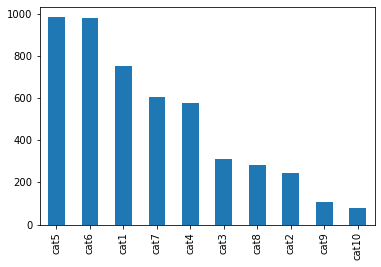

In [3]:
df['category'].value_counts().plot.bar()
print(df['category'].value_counts())
print("\n Total json files/image files = : ", df.shape[0])

Lets plot the graph to look at our dataset trend

Plotting of ALL JSON angle values on graph

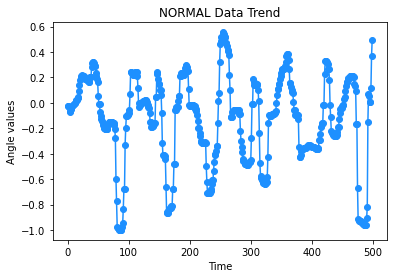

In [4]:
plt.title("NORMAL Data Trend")
plt.xlabel("Time")          
plt.ylabel("Angle values")
plt.plot(df['angle_value'][0:500], marker="o", color="dodgerblue")  

Lets see a sample of our image

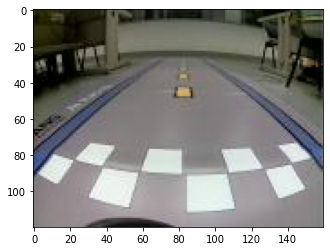

In [5]:
sample = filenames[x+1]
image = load_img(filepath+sample)
plt.imshow(image)

# 4. Create CNN Model

We can reduce overfitting of our model with BatchNorm and Dropout layers. 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120,160, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))                           

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2)) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) #10 because we 10 classes

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

INFO:plaidml:Opening device "opencl_amd_bristol_ridge.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 158, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 118, 158, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 118, 158, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 77, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 57, 77, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 57, 77, 64)        0         
__________

# 5. Use Callbacks and EarlyStop to improve accuracy

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) #00001)
callbacks = [earlystop, learning_rate_reduction]

# 6. Since we do not convert data since we are not categorizing by filename (Unlike other 2 projects), we do not need to use ImageGenerator to convert data to 1 hot encoding 

# 7. Use train_test_split to split our files into 80% train and 20% validation and state 0 to prevent random splitting

cat5     806
cat6     785
cat1     584
cat7     478
cat4     456
cat3     247
cat8     235
cat2     197
cat9      78
cat10     67
Name: category, dtype: int64

 Total train images:  3933


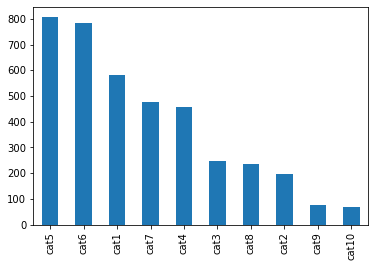

In [9]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
print("\n Total train images: ", train_df.shape[0])

cat6     196
cat5     176
cat1     168
cat7     127
cat4     121
cat3      63
cat8      49
cat2      46
cat9      27
cat10     11
Name: category, dtype: int64

 Total validate images:  984


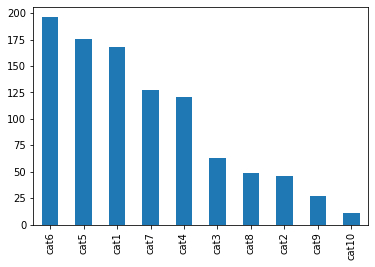

In [10]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [11]:
# Get total train and validate, and batch size to fit model

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 3933
Total validate images: 984


# 8. Use Data Augmentation to increase our dataset size

# 9. Create train and validation generator to load images

In [18]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    brightness_range = [0.8,0.8],
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create train and valdiation generator
# From data folder, we split the data into train and validate. 
# The image in train and validate are taken from data, BUT do not contain the same images
# I checked by running 'submission.validate_df(copy)/train_df(copy)'

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    filepath, 
    x_col='image_filename',
    y_col='category',
    target_size=(120,160),
    class_mode='categorical', 
    batch_size=20,
    
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    filepath, 
    x_col='image_filename',
    y_col='category',
    target_size=(120,160),
    class_mode='categorical',
    batch_size=20
)

Found 3933 validated image filenames belonging to 10 classes.
Found 984 validated image filenames belonging to 10 classes.


Lets take a look at how augmented images from train generator look like

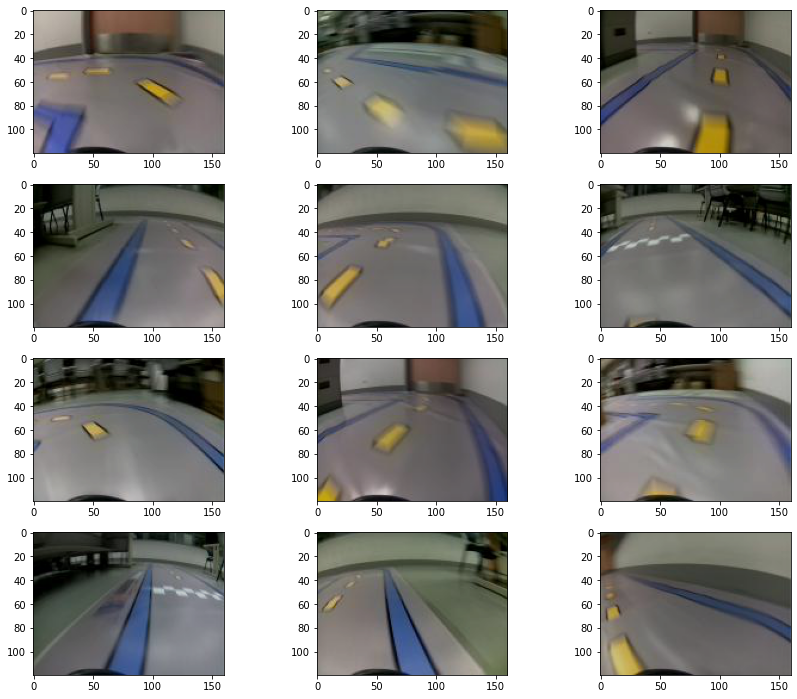

In [19]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 10. Train the model

If val loss is higher than train loss, there is overfitting. We want to reduce overfitting so change your model architecture with overfitting reducers like BatchNorm/Dropout

In [20]:
%%time

epochs=26
batch_size=20  

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

Epoch 1/26
197/196 [==============================] - 320s 2s/step - loss: 1.2284 - acc: 0.4980 - val_loss: 1.4474 - val_acc: 0.4075
Epoch 2/26
197/196 [==============================] - 304s 2s/step - loss: 1.1414 - acc: 0.5401 - val_loss: 1.5093 - val_acc: 0.4187
Epoch 3/26
197/196 [==============================] - 305s 2s/step - loss: 1.0556 - acc: 0.5869 - val_loss: 1.3877 - val_acc: 0.4705
Epoch 4/26
197/196 [==============================] - 353s 2s/step - loss: 0.9967 - acc: 0.6053 - val_loss: 1.2369 - val_acc: 0.5010
Epoch 5/26
197/196 [==============================] - 368s 2s/step - loss: 0.9108 - acc: 0.6388 - val_loss: 1.2732 - val_acc: 0.5132
Epoch 6/26
197/196 [==============================] - 330s 2s/step - loss: 0.8484 - acc: 0.6647 - val_loss: 1.2302 - val_acc: 0.5346
Epoch 7/26
197/196 [==============================] - 255s 1s/step - loss: 0.7753 - acc: 0.7016 - val_loss: 1.4709 - val_acc: 0.4593
Epoch 8/26
197/196 [==============================] - 264s 1s/step - 

# 11. Plot the graph results for trained model

** If you are using GPU, plotting graph requires model metric 'accuracy' to be changed to 'acc' in the code below

If not, no changes are needed

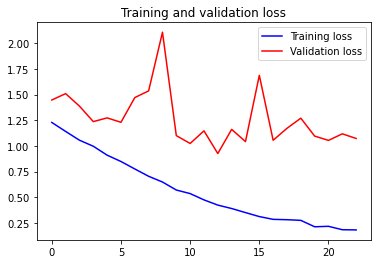

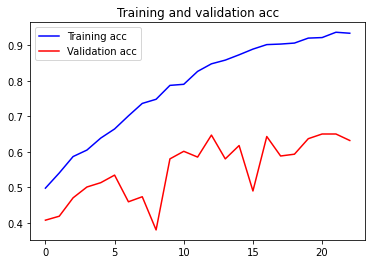

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, accuracy, 'blue', label='Training acc')
plt.plot(epochs, val_accuracy, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='best')

plt.show()

# 12. Save the trained model to re-use without having to re-train
You can set any filename you like, I set mine as 'SavedModel1'

In [22]:
model.save('SavedModel1.hdf5')  # creates a HDF5 file 'my_model.h5'

# 13. Open the Car Angle Direction Classification (TestFile) notebook in a new tab
Only opens the .ipynb file in a new tab

In [4]:
import webbrowser
webbrowser.open('http://localhost:8888/notebooks/Desktop/FYP/Car_Angle_Direction_Classification (TestFile).ipynb') 

True